In [207]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns

In [208]:
clean_df = pd.read_csv("../data/clean/clean_summer_df_events.csv") 

In [209]:
country_df = pd.read_csv("../data/raw/country_table.csv") 
event_df = pd.read_csv("../data/raw/event_table.csv") 

In [210]:
clean_df.head()

,Unnamed: 0,host_country,game_year,event,medal_type,athlete_country
0,0,japan,2020,shooting - 50m rifle 3 positions women,silver,roc
1,1,japan,2020,shooting - 50m rifle 3 positions women,bronze,roc
2,2,japan,2020,shooting - 50m rifle 3 positions women,gold,switzerland
3,3,japan,2020,shooting - 50m rifle 3 positions men,bronze,serbia
4,4,japan,2020,shooting - 50m rifle 3 positions men,gold,china


In [211]:
country_df.head()

,country_name,continent,hemisphere
0,afghanistan,asia,northern
1,albania,europe,northern
2,algeria,africa,northern
3,argentina,south america,southern
4,armenia,asia,northern


In [212]:
merged_df = clean_df.merge(country_df, left_on="athlete_country", right_on="country_name", how = 'left').reset_index(drop=True)

merged_df.head()

,Unnamed: 0,host_country,game_year,event,medal_type,athlete_country,country_name,continent,hemisphere
0,0,japan,2020,shooting - 50m rifle 3 positions women,silver,roc,roc,"europe, asia",northern
1,1,japan,2020,shooting - 50m rifle 3 positions women,bronze,roc,roc,"europe, asia",northern
2,2,japan,2020,shooting - 50m rifle 3 positions women,gold,switzerland,switzerland,europe,northern
3,3,japan,2020,shooting - 50m rifle 3 positions men,bronze,serbia,serbia,europe,northern
4,4,japan,2020,shooting - 50m rifle 3 positions men,gold,china,china,asia,northern


In [213]:
event_df.head()

,event,discipline,sub-discipline
0,archery - women's individual,archery,archery
1,archery - men's individual,archery,archery
2,archery - individual competition men,archery,archery
3,archery - individual competition women,archery,archery
4,archery - individual fita olympic round 70m men,archery,archery


In [214]:
merged_df = merged_df.merge(event_df, left_on="event", right_on="event", how = 'left').reset_index(drop=True)

merged_df.head()

,Unnamed: 0,host_country,game_year,event,medal_type,athlete_country,country_name,continent,hemisphere,discipline,sub-discipline
0,0,japan,2020,shooting - 50m rifle 3 positions women,silver,roc,roc,"europe, asia",northern,shooting,shooting
1,1,japan,2020,shooting - 50m rifle 3 positions women,bronze,roc,roc,"europe, asia",northern,shooting,shooting
2,2,japan,2020,shooting - 50m rifle 3 positions women,gold,switzerland,switzerland,europe,northern,shooting,shooting
3,3,japan,2020,shooting - 50m rifle 3 positions men,bronze,serbia,serbia,europe,northern,shooting,shooting
4,4,japan,2020,shooting - 50m rifle 3 positions men,gold,china,china,asia,northern,shooting,shooting


In [215]:
merged_df.columns

Index(['Unnamed: 0', 'host_country', 'game_year', 'event', 'medal_type',
       'athlete_country', 'country_name', 'continent', 'hemisphere',
       'discipline', 'sub-discipline'],
      dtype='object')

In [216]:
merged_df = merged_df[['host_country', 'game_year', 'event', 'medal_type',
       'athlete_country', 'continent', 'hemisphere',
       'discipline', 'sub-discipline']]

In [217]:
merged_df = merged_df.rename(columns={'continent': 'athlete_continent', 'hemisphere': 'athlete_hemisphere'})

merged_df.head()

,host_country,game_year,event,medal_type,athlete_country,athlete_continent,athlete_hemisphere,discipline,sub-discipline
0,japan,2020,shooting - 50m rifle 3 positions women,silver,roc,"europe, asia",northern,shooting,shooting
1,japan,2020,shooting - 50m rifle 3 positions women,bronze,roc,"europe, asia",northern,shooting,shooting
2,japan,2020,shooting - 50m rifle 3 positions women,gold,switzerland,europe,northern,shooting,shooting
3,japan,2020,shooting - 50m rifle 3 positions men,bronze,serbia,europe,northern,shooting,shooting
4,japan,2020,shooting - 50m rifle 3 positions men,gold,china,asia,northern,shooting,shooting


In [218]:
merged_df = merged_df.merge(country_df, left_on="host_country", right_on="country_name", how = 'left').reset_index(drop=True)

merged_df.head()

,host_country,game_year,event,medal_type,athlete_country,athlete_continent,athlete_hemisphere,discipline,sub-discipline,country_name,continent,hemisphere
0,japan,2020,shooting - 50m rifle 3 positions women,silver,roc,"europe, asia",northern,shooting,shooting,japan,asia,northern
1,japan,2020,shooting - 50m rifle 3 positions women,bronze,roc,"europe, asia",northern,shooting,shooting,japan,asia,northern
2,japan,2020,shooting - 50m rifle 3 positions women,gold,switzerland,europe,northern,shooting,shooting,japan,asia,northern
3,japan,2020,shooting - 50m rifle 3 positions men,bronze,serbia,europe,northern,shooting,shooting,japan,asia,northern
4,japan,2020,shooting - 50m rifle 3 positions men,gold,china,asia,northern,shooting,shooting,japan,asia,northern


In [219]:
merged_df = merged_df.rename(columns={'continent': 'host_continent', 'hemisphere': 'host_hemisphere'})

merged_df.drop(columns="country_name", inplace=True)

merged_df.head()

,host_country,game_year,event,medal_type,athlete_country,athlete_continent,athlete_hemisphere,discipline,sub-discipline,host_continent,host_hemisphere
0,japan,2020,shooting - 50m rifle 3 positions women,silver,roc,"europe, asia",northern,shooting,shooting,asia,northern
1,japan,2020,shooting - 50m rifle 3 positions women,bronze,roc,"europe, asia",northern,shooting,shooting,asia,northern
2,japan,2020,shooting - 50m rifle 3 positions women,gold,switzerland,europe,northern,shooting,shooting,asia,northern
3,japan,2020,shooting - 50m rifle 3 positions men,bronze,serbia,europe,northern,shooting,shooting,asia,northern
4,japan,2020,shooting - 50m rifle 3 positions men,gold,china,asia,northern,shooting,shooting,asia,northern


In [220]:
merged_df['is_host_country'] = merged_df['host_country'] == merged_df['athlete_country']
merged_df['is_host_continent'] = merged_df['host_continent'] == merged_df['athlete_continent']

merged_df.head()

,host_country,game_year,event,medal_type,athlete_country,athlete_continent,athlete_hemisphere,discipline,sub-discipline,host_continent,host_hemisphere,is_host_country,is_host_continent
0,japan,2020,shooting - 50m rifle 3 positions women,silver,roc,"europe, asia",northern,shooting,shooting,asia,northern,False,False
1,japan,2020,shooting - 50m rifle 3 positions women,bronze,roc,"europe, asia",northern,shooting,shooting,asia,northern,False,False
2,japan,2020,shooting - 50m rifle 3 positions women,gold,switzerland,europe,northern,shooting,shooting,asia,northern,False,False
3,japan,2020,shooting - 50m rifle 3 positions men,bronze,serbia,europe,northern,shooting,shooting,asia,northern,False,False
4,japan,2020,shooting - 50m rifle 3 positions men,gold,china,asia,northern,shooting,shooting,asia,northern,False,True


In [221]:
merged_df.columns

Index(['host_country', 'game_year', 'event', 'medal_type', 'athlete_country',
       'athlete_continent', 'athlete_hemisphere', 'discipline',
       'sub-discipline', 'host_continent', 'host_hemisphere',
       'is_host_country', 'is_host_continent'],
      dtype='object')

In [222]:
filt_df = merged_df[['game_year', 'event', 'medal_type', 'athlete_country',
       'athlete_continent', 'discipline',
       'sub-discipline', 'host_country', 'host_continent',
       'is_host_country', 'is_host_continent']]

filt_df.tail()

,game_year,event,medal_type,athlete_country,athlete_continent,discipline,sub-discipline,host_country,host_continent,is_host_country,is_host_continent
16397,2024,water polo - men,gold,serbia,europe,water polo,water polo,france,europe,False,True
16398,2024,water polo - men,silver,croatia,europe,water polo,water polo,france,europe,False,True
16399,2024,water polo - men,bronze,usa,north america,water polo,water polo,france,europe,False,False
16400,2024,rhythmic gymnastics - group all-around,silver,israel,asia,gymnastics,gymnastics rhythmic,france,europe,False,False
16401,2024,rhythmic gymnastics - group all-around,bronze,italy,europe,gymnastics,gymnastics rhythmic,france,europe,False,True


In [223]:
country_medals = filt_df.groupby(['athlete_country', 'game_year', 'medal_type', 'discipline',
                                  'is_host_country', 'is_host_continent']).size().reset_index(name='medal_count')

country_medals.head()

,athlete_country,game_year,medal_type,discipline,is_host_country,is_host_continent,medal_count
0,afghanistan,2008,bronze,taekwondo,False,True,1
1,afghanistan,2012,bronze,taekwondo,False,False,1
2,albania,2024,bronze,wrestling,False,True,2
3,algeria,1984,bronze,boxing,False,False,2
4,algeria,1992,bronze,boxing,False,False,1


In [224]:
last40 = country_medals[country_medals['game_year'] > 1980]

last40hosts = list(last40[last40['is_host_country'] == True]['athlete_country'])

piv = last40.pivot_table(
    index=['athlete_country', 'is_host_country'],  
    columns=['game_year'],  
    values='medal_count', 
    aggfunc='sum', 
    fill_value=0 
)

column_totals = piv.sum(axis=0)
piv_pct = round((piv.div(column_totals, axis=1) * 100),2).reset_index()

# Step 2: Calculate the average percentage across all game_years (columns)
#piv_pct['average_%'] = piv_pct.iloc[:, 2:].mean(axis=1)  # Skip index columns, take the mean of the medal percentages

last_40_win_rates = piv_pct[piv_pct['athlete_country'].isin(last40hosts)]

last_40_win_rates

game_year,athlete_country,is_host_country,1984,1988,1992,1996,2000,2004,2008,2012,2016,2020,2024
5,australia,False,3.49,1.90,3.21,4.87,0.00,5.40,4.81,3.66,2.98,4.26,5.26
6,australia,True,0.00,0.00,0.00,0.00,6.26,0.00,0.00,0.00,0.00,0.00,0.00
16,brazil,False,1.16,0.81,0.37,1.78,1.29,1.08,1.78,1.78,0.00,1.95,1.98
17,brazil,True,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.95,0.00,0.00
25,china,False,4.65,3.80,6.55,5.94,6.26,6.80,0.00,9.51,7.19,8.16,8.43
26,china,True,0.00,0.00,0.00,0.00,0.00,0.00,10.45,0.00,0.00,0.00,0.00
49,france,False,4.07,2.17,3.58,4.39,4.10,3.56,4.49,3.66,4.32,3.06,0.00
50,france,True,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,5.95
56,great britain,False,5.38,3.26,2.47,1.78,3.02,3.24,5.33,0.00,6.89,6.02,5.85
57,great britain,True,0.00,0.00,0.00,0.00,0.00,0.00,0.00,6.79,0.00,0.00,0.00


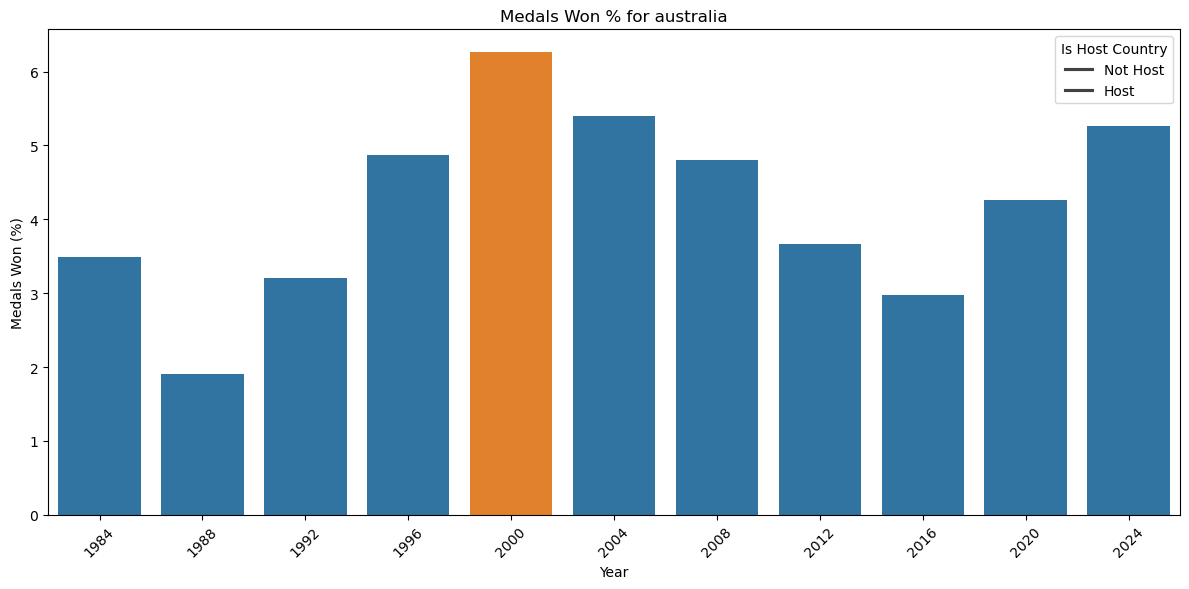

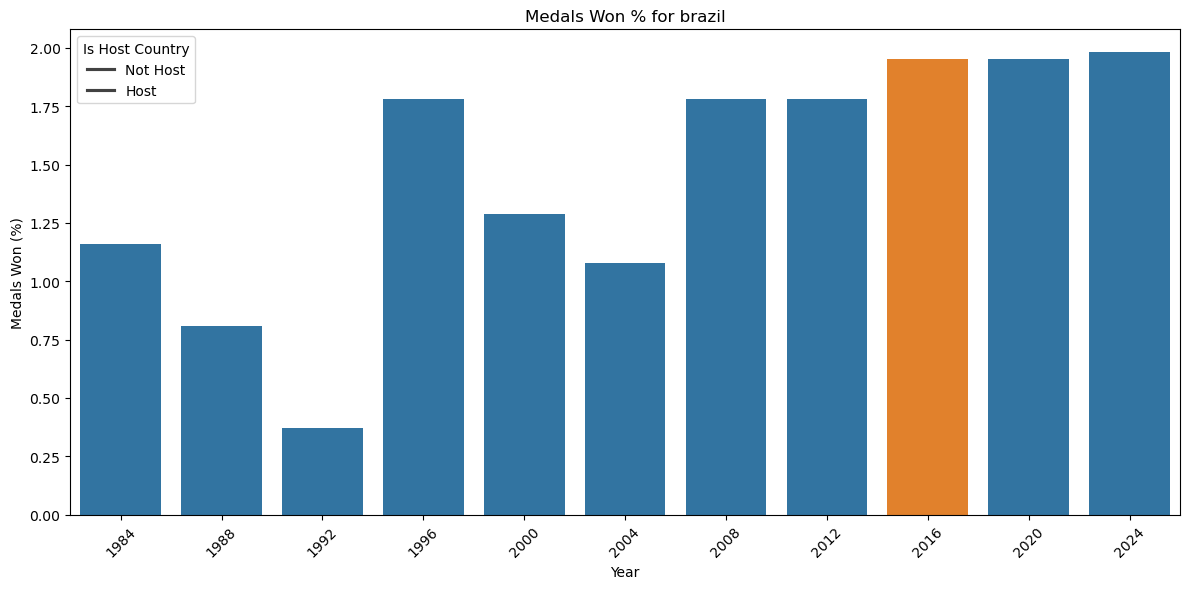

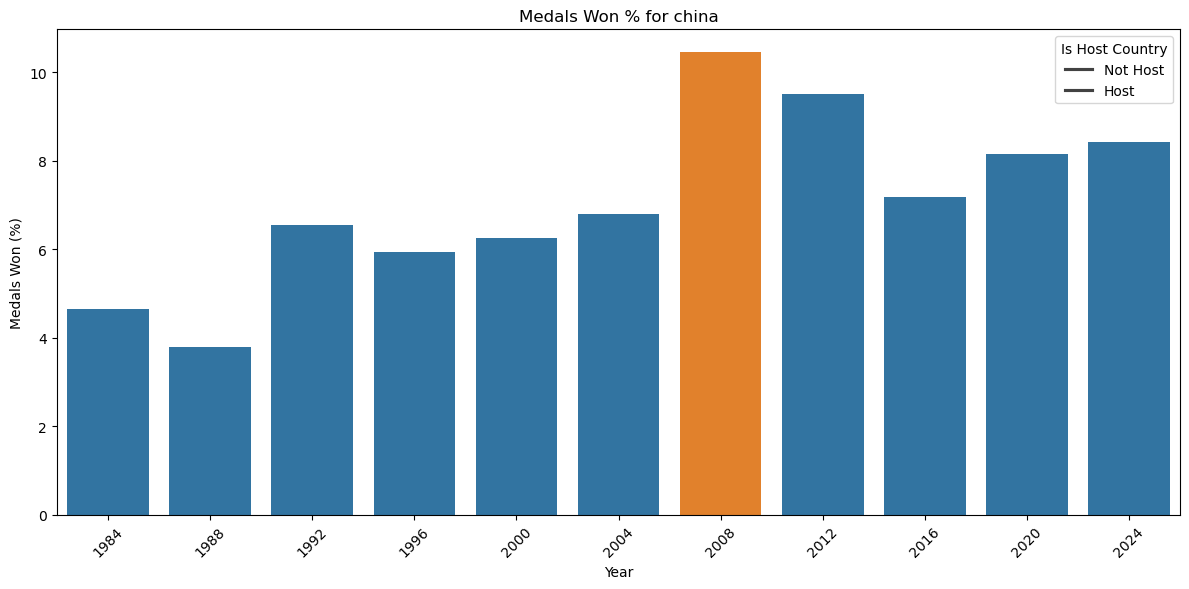

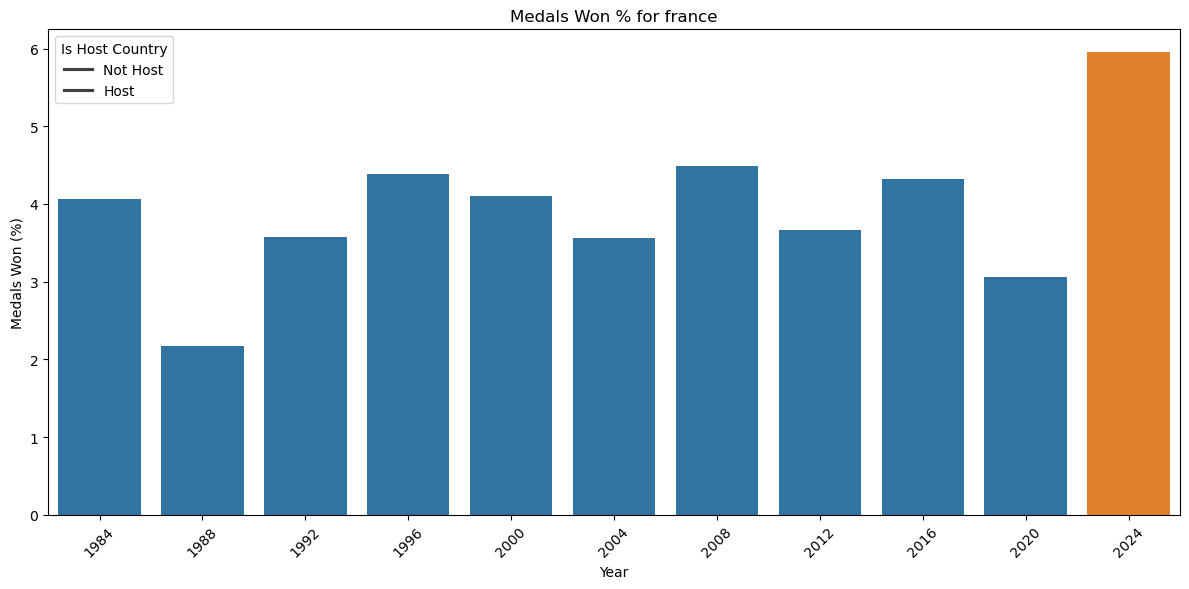

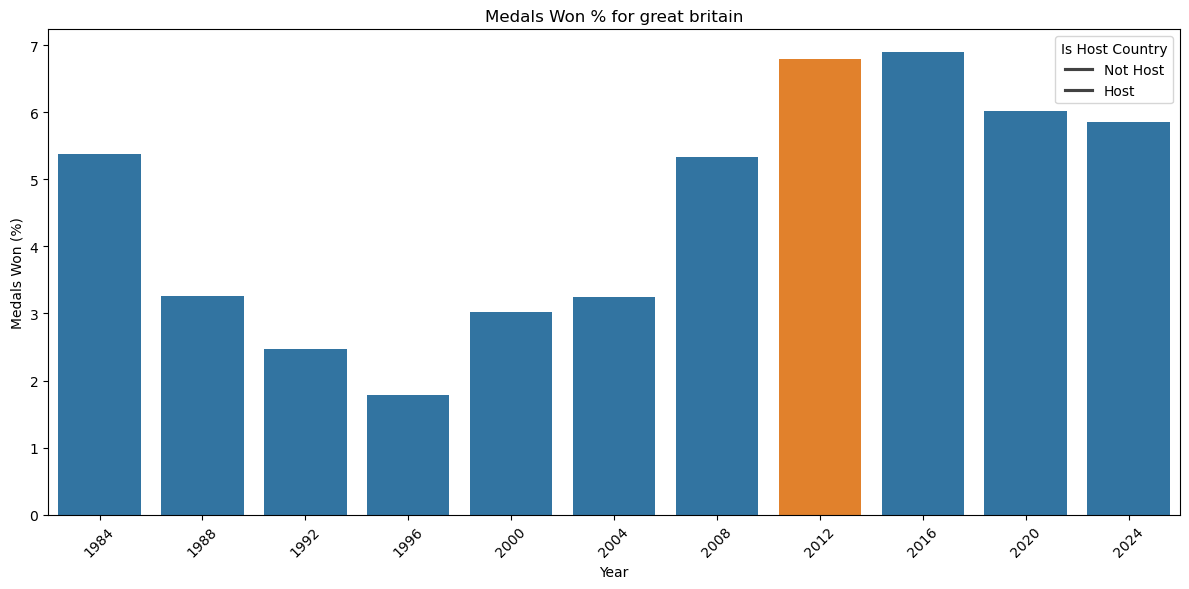

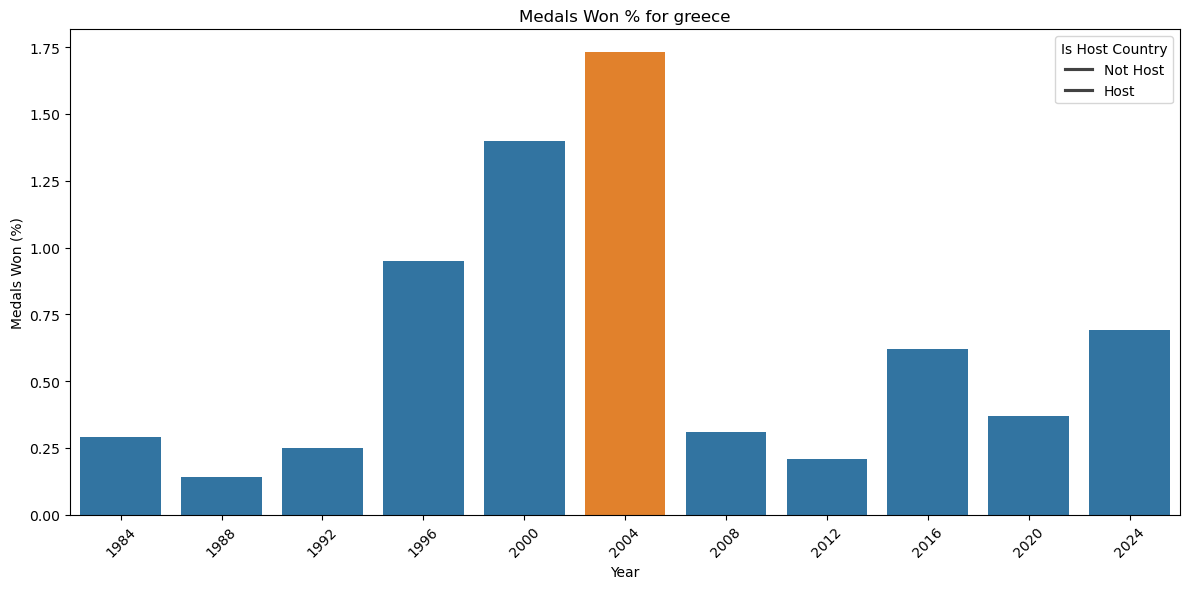

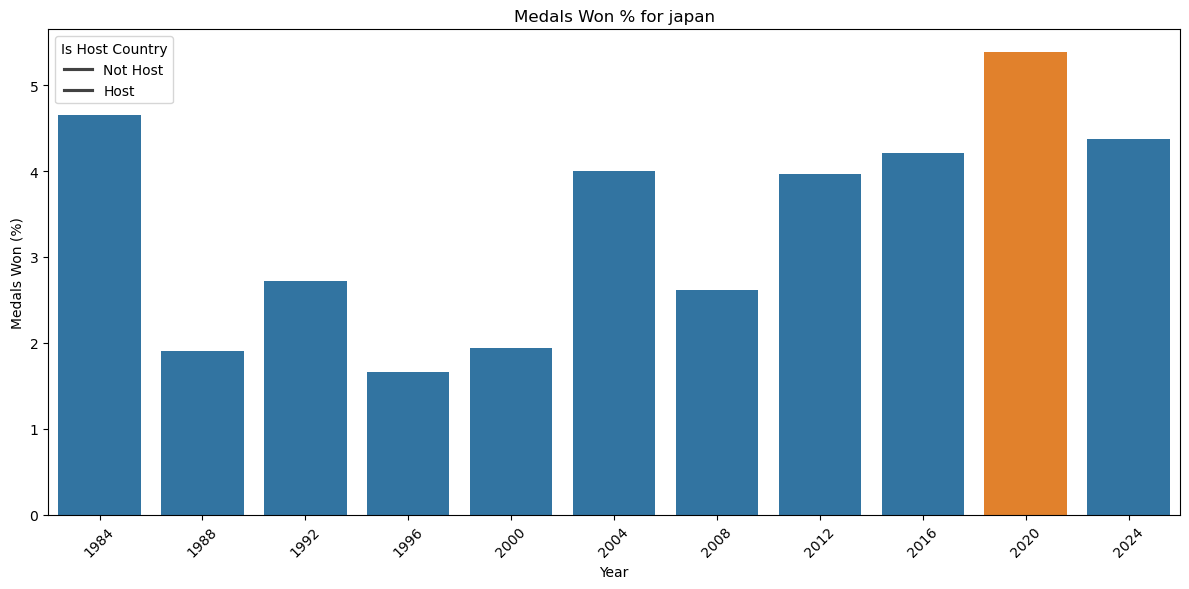

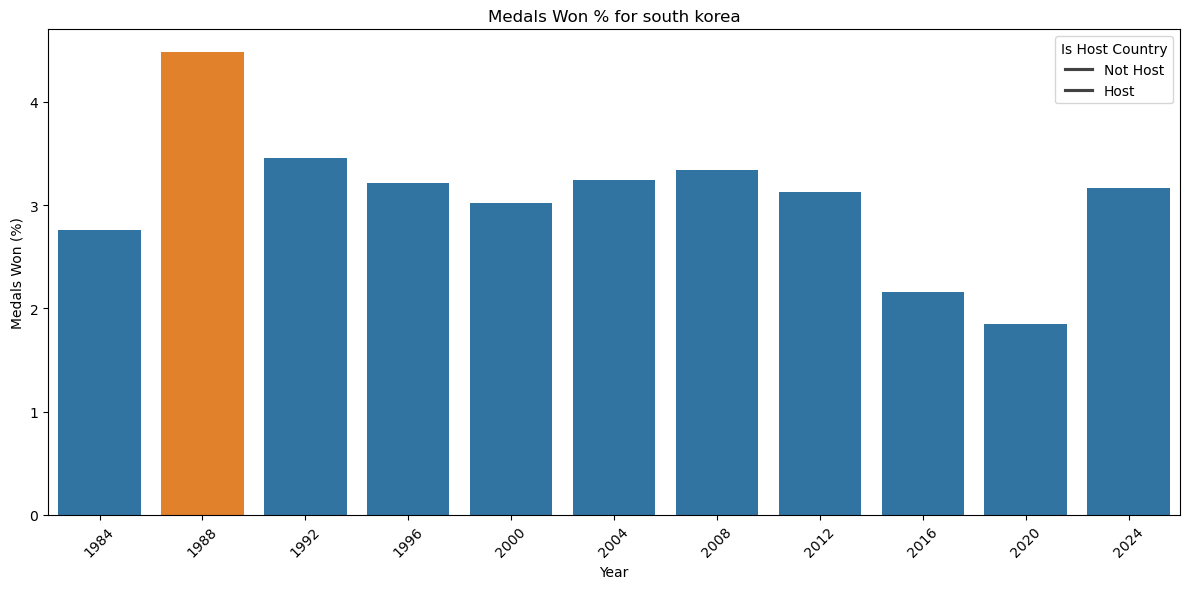

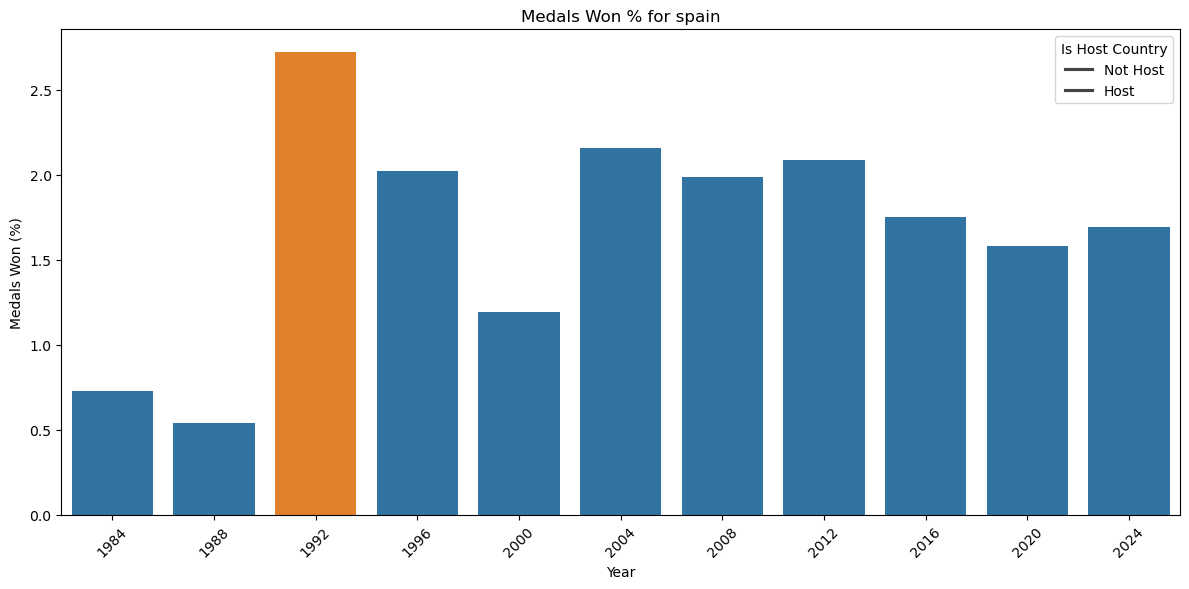

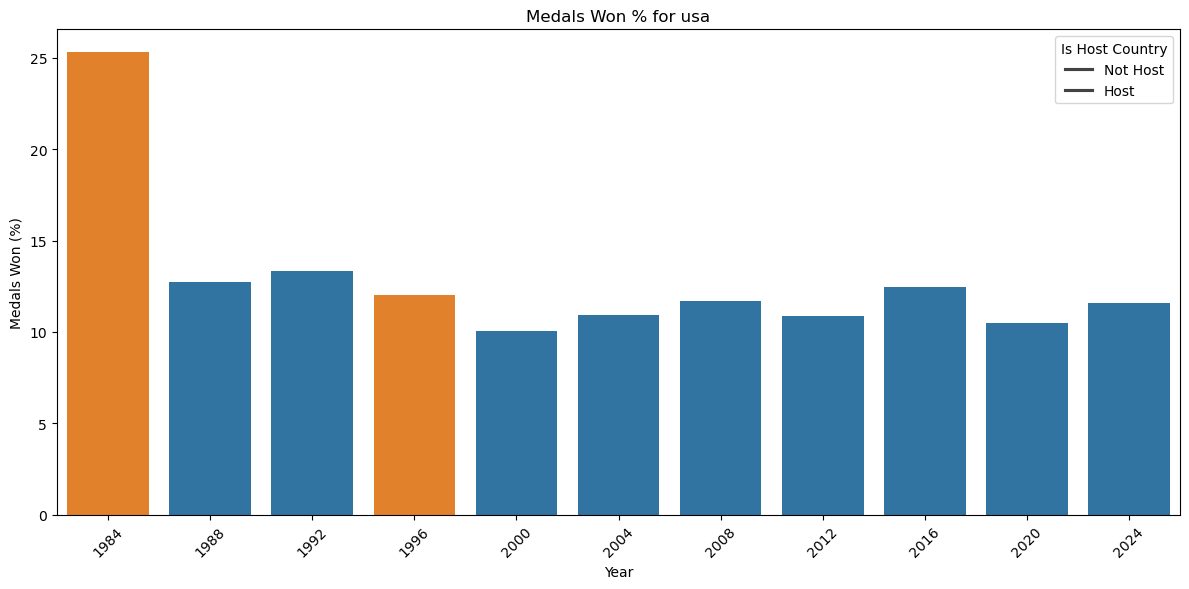

In [225]:
import matplotlib.pyplot as plt

for country in last_40_win_rates['athlete_country'].unique():
    # Filter data for the current country
    country_data = last_40_win_rates[last_40_win_rates['athlete_country'] == country]
    
    # Melt the data to have a 'game_year' column and 'medal_percentage' with 'is_host_country' as variable
    country_data_melted = country_data.melt(
        id_vars=['athlete_country', 'is_host_country'],
        var_name='game_year',
        value_name='medal_percentage'
    )
    
    # Convert game_year to integers for proper sorting and plotting
    country_data_melted['game_year'] = country_data_melted['game_year'].astype(int)
    
    # Plot
    plt.figure(figsize=(12, 6))
    sns.barplot(
        data=country_data_melted,
        x='game_year',
        y='medal_percentage',
        hue='is_host_country',
        dodge=False
    )
    
    # Set plot title and labels
    plt.title(f"Medals Won % for {country}")
    plt.xlabel("Year")
    plt.ylabel("Medals Won (%)")
    plt.xticks(rotation=45)
    
    # Adjust legend to show 'Host' and 'Not Host' instead of True/False
    plt.legend(title="Is Host Country", labels=["Not Host", "Host"])
    
    # Show the plot
    plt.tight_layout()
    plt.show()

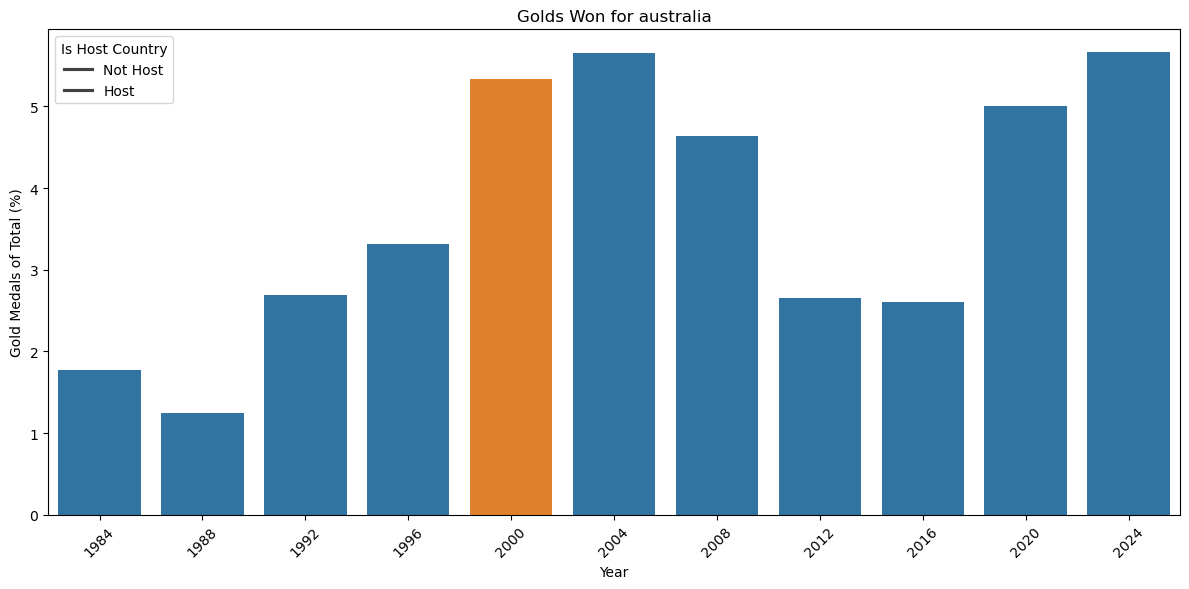

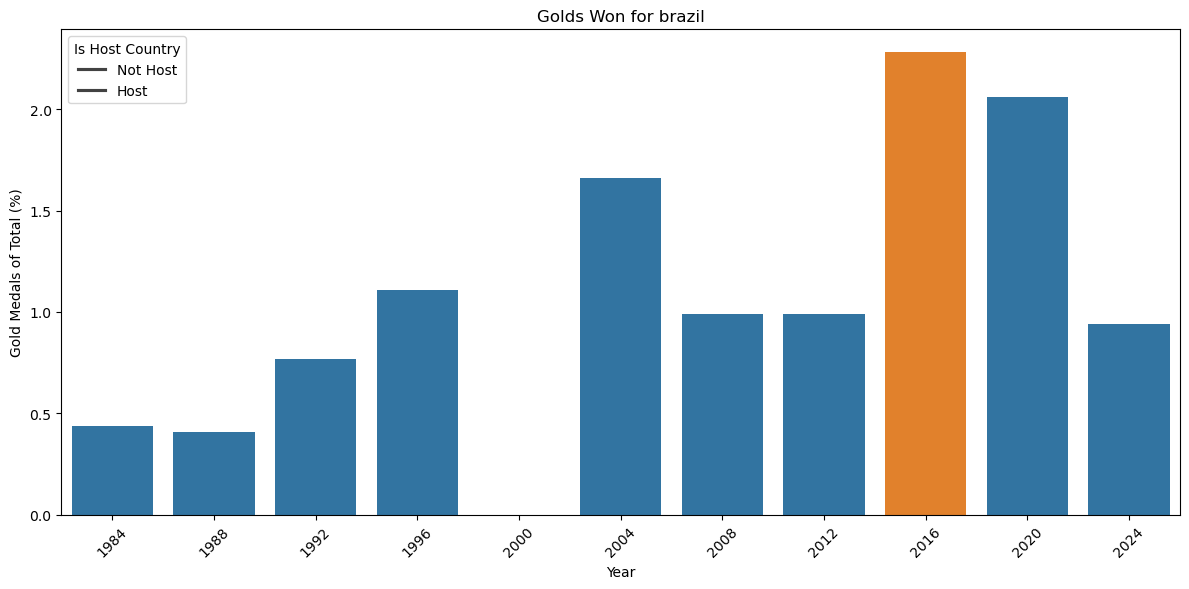

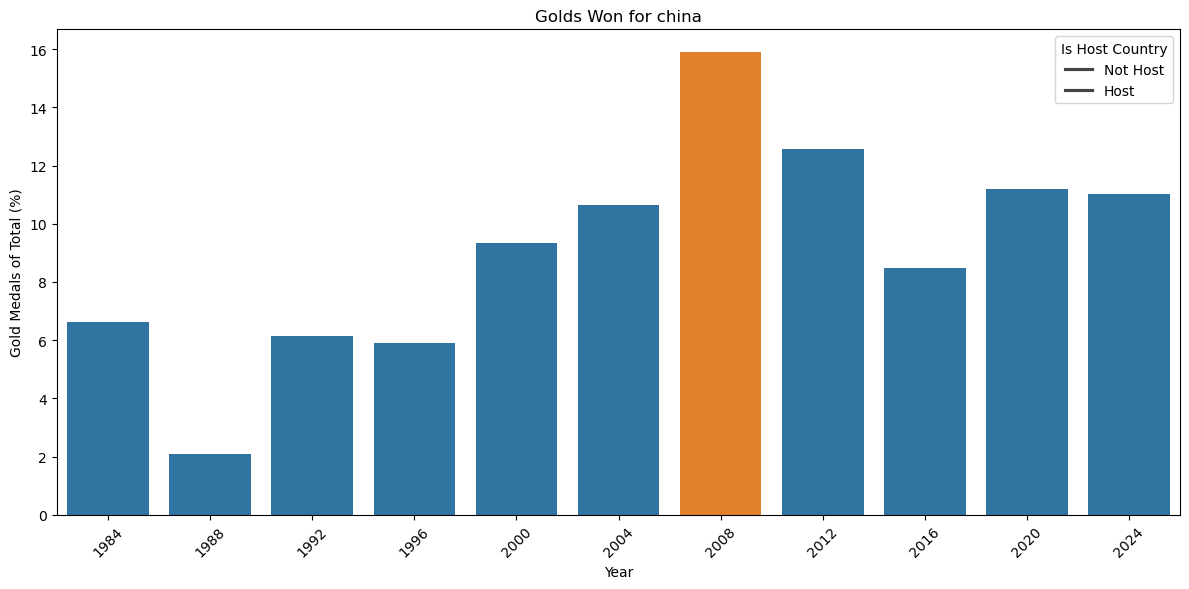

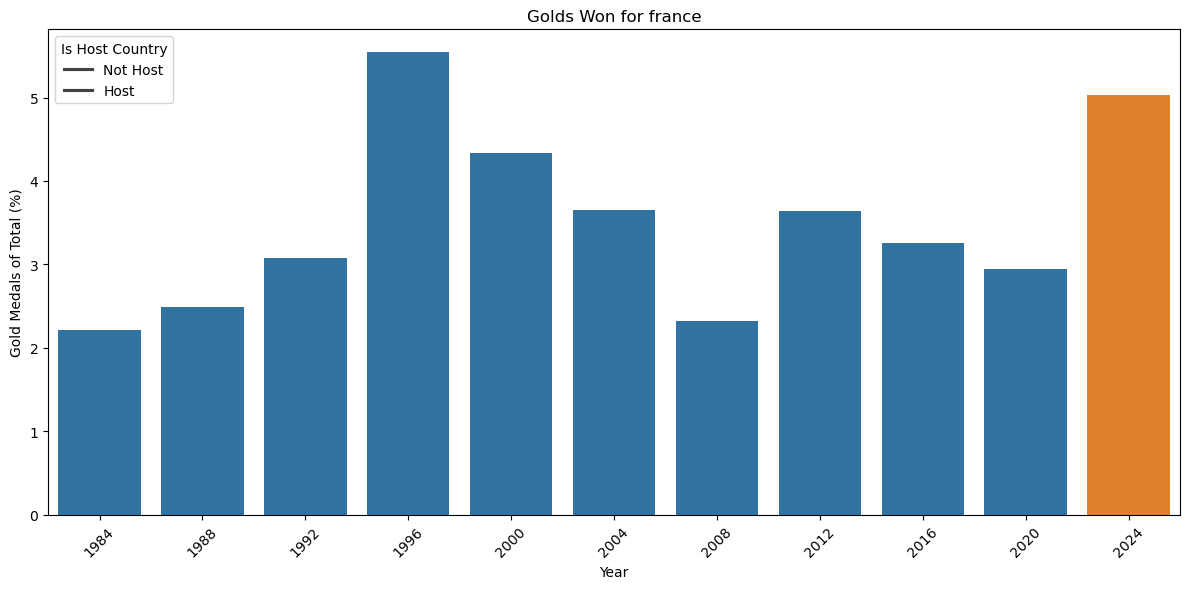

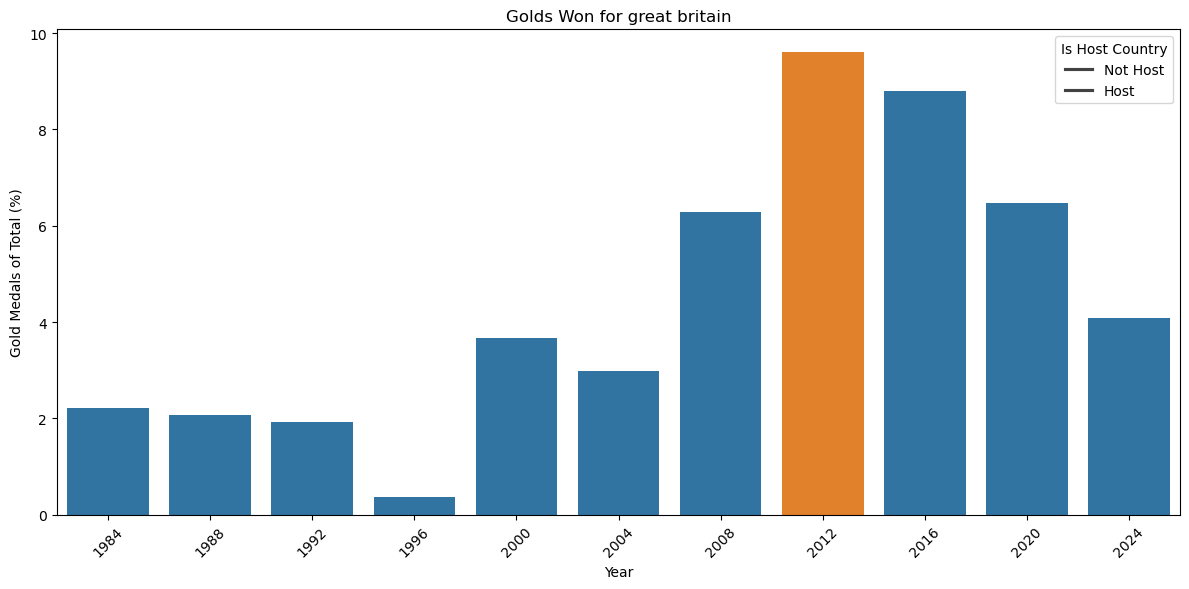

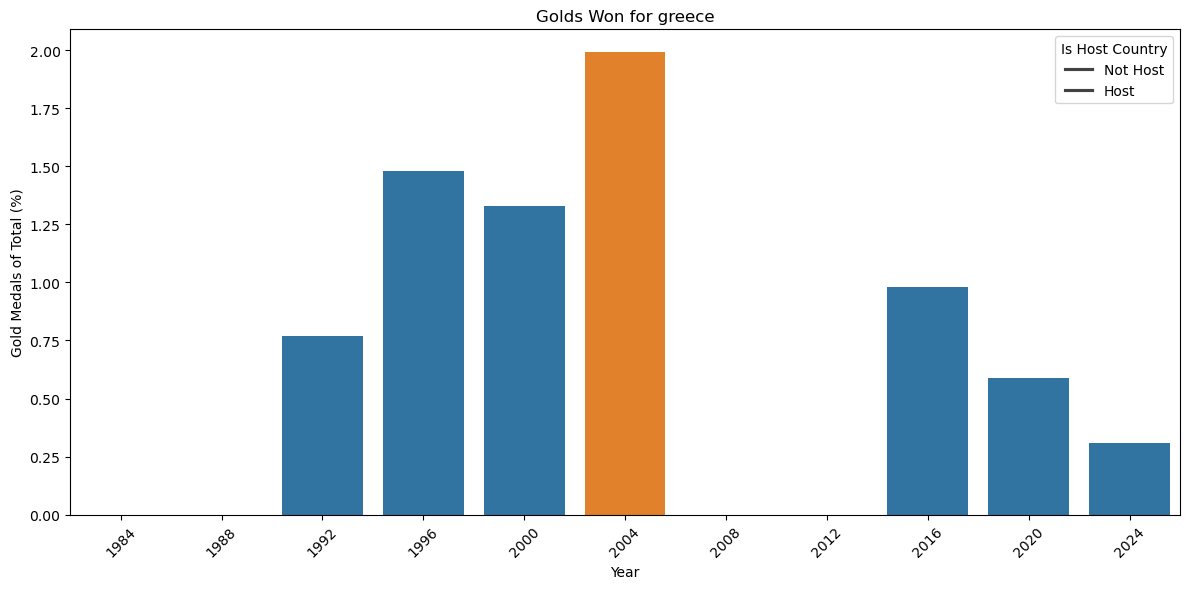

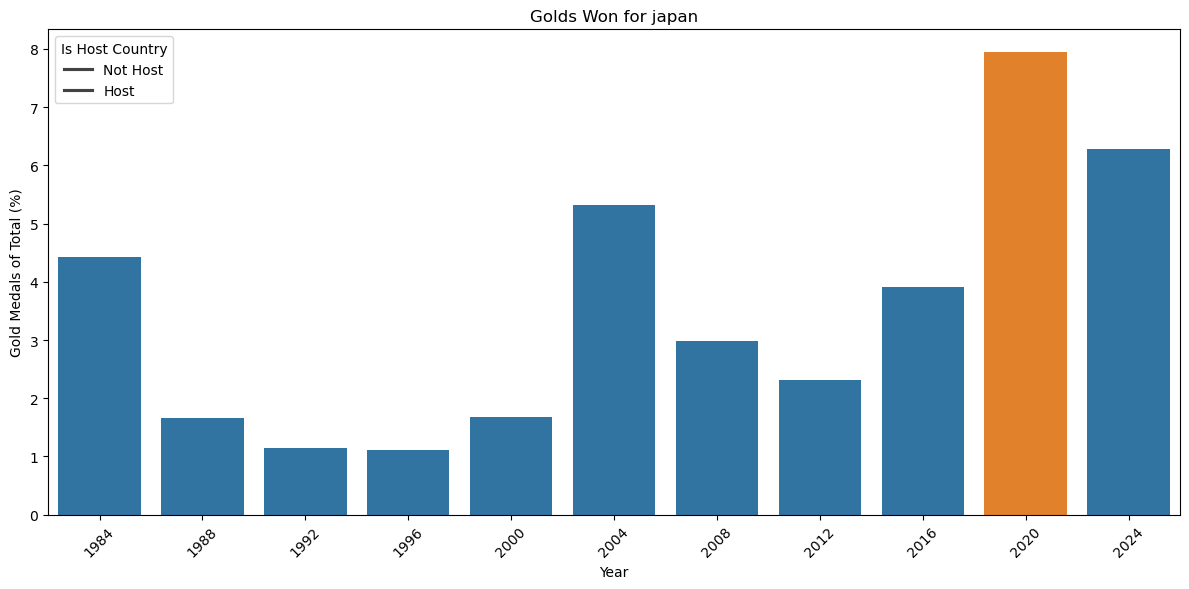

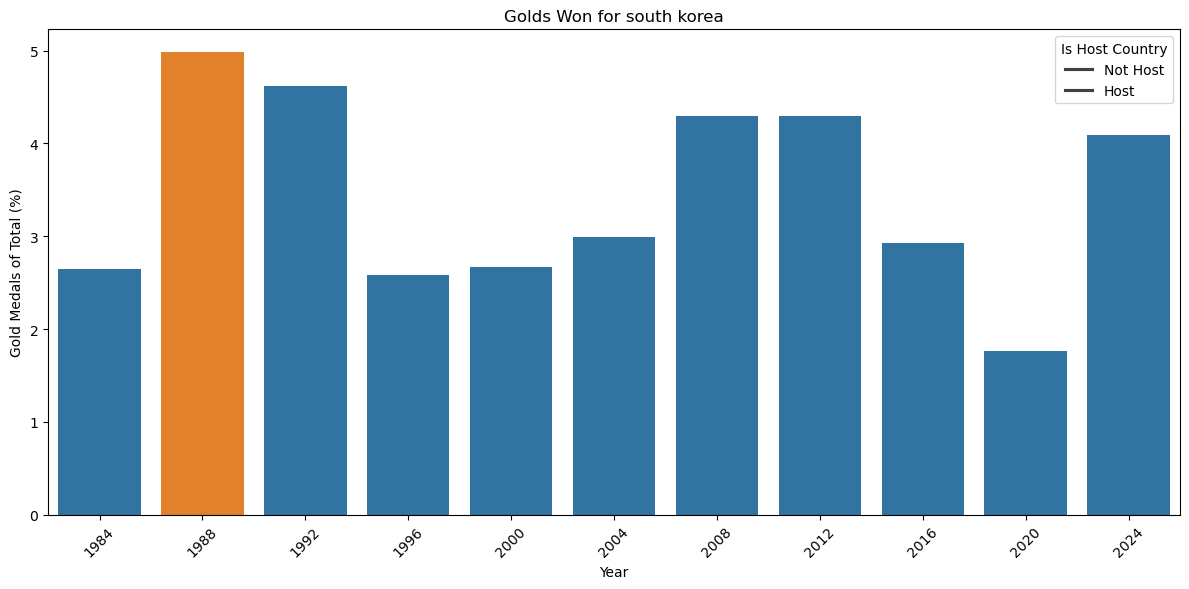

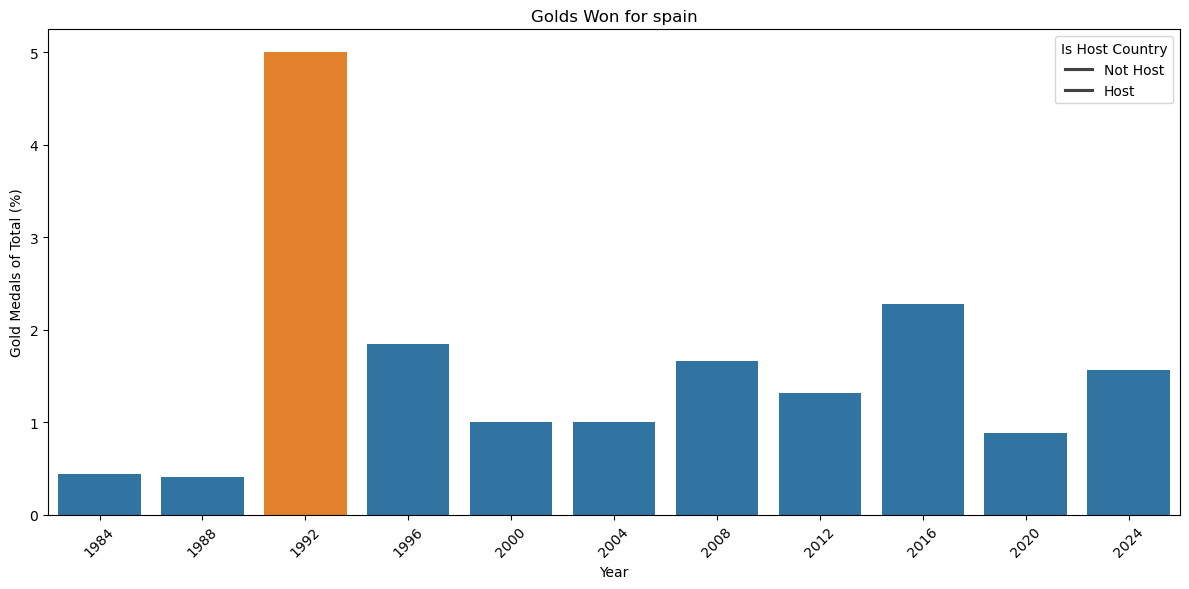

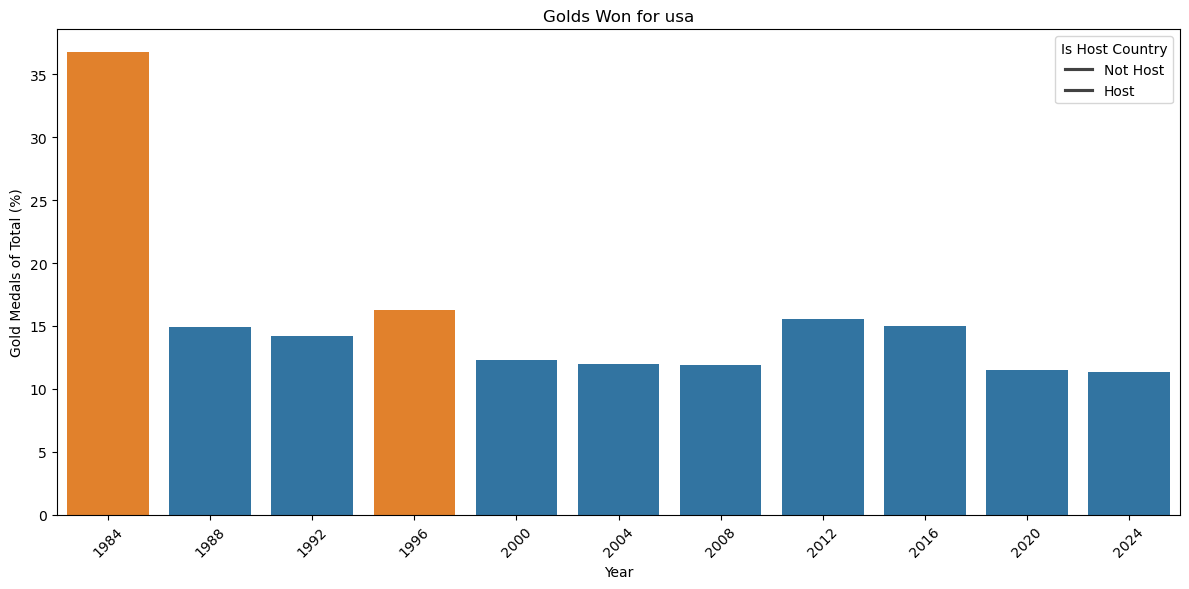

In [226]:
import matplotlib.pyplot as plt

last40 = country_medals[country_medals['game_year'] > 1980]
last40g = last40[last40['medal_type'] == 'gold']

last40hosts = list(last40g[last40g['is_host_country'] == True]['athlete_country'])

piv = last40g.pivot_table(
    index=['athlete_country', 'is_host_country'],  
    columns=['game_year'],  
    values='medal_count', 
    aggfunc='sum', 
    fill_value=0 
)

column_totals = piv.sum(axis=0)
piv_pct = round((piv.div(column_totals, axis=1) * 100),2).reset_index()

# Step 2: Calculate the average percentage across all game_years (columns)
#piv_pct['average_%'] = piv_pct.iloc[:, 2:].mean(axis=1)  # Skip index columns, take the mean of the medal percentages

last_40_win_rates = piv_pct[piv_pct['athlete_country'].isin(last40hosts)]

last_40_win_rates

for country in last_40_win_rates['athlete_country'].unique():
    # Filter data for the current country
    country_data = last_40_win_rates[last_40_win_rates['athlete_country'] == country]
    
    # Melt the data to have a 'game_year' column and 'medal_percentage' with 'is_host_country' as variable
    country_data_melted = country_data.melt(
        id_vars=['athlete_country', 'is_host_country'],
        var_name='game_year',
        value_name='medal_percentage'
    )
    
    # Convert game_year to integers for proper sorting and plotting
    country_data_melted['game_year'] = country_data_melted['game_year'].astype(int)
    
    # Plot
    plt.figure(figsize=(12, 6))
    sns.barplot(
        data=country_data_melted,
        x='game_year',
        y='medal_percentage',
        hue='is_host_country',
        dodge=False
    )
    
    # Set plot title and labels
    plt.title(f"Golds Won for {country}")
    plt.xlabel("Year")
    plt.ylabel("Gold Medals of Total (%)")
    plt.xticks(rotation=45)
    
    # Adjust legend to show 'Host' and 'Not Host' instead of True/False
    plt.legend(title="Is Host Country", labels=["Not Host", "Host"])
    
    # Show the plot
    plt.tight_layout()
    plt.show()

In [227]:
country_medals.head()

,athlete_country,game_year,medal_type,discipline,is_host_country,is_host_continent,medal_count
0,afghanistan,2008,bronze,taekwondo,False,True,1
1,afghanistan,2012,bronze,taekwondo,False,False,1
2,albania,2024,bronze,wrestling,False,True,2
3,algeria,1984,bronze,boxing,False,False,2
4,algeria,1992,bronze,boxing,False,False,1


In [228]:
df = country_medals.copy()

total_medals_per_year = df.groupby('game_year')['medal_count'].sum()

# Step 2: Merge total medals with the original DataFrame to calculate percentages
df = df.merge(total_medals_per_year, on='game_year', suffixes=('', '_year_total'))
df.head()

,athlete_country,game_year,medal_type,discipline,is_host_country,is_host_continent,medal_count,medal_count_year_total
0,afghanistan,2008,bronze,taekwondo,False,True,1,957
1,afghanistan,2012,bronze,taekwondo,False,False,1,957
2,albania,2024,bronze,wrestling,False,True,2,1008
3,algeria,1984,bronze,boxing,False,False,2,688
4,algeria,1992,bronze,boxing,False,False,1,809


In [292]:
country_medals.head()

,athlete_country,game_year,medal_type,discipline,is_host_country,is_host_continent,medal_count
0,afghanistan,2008,bronze,taekwondo,False,True,1
1,afghanistan,2012,bronze,taekwondo,False,False,1
2,albania,2024,bronze,wrestling,False,True,2
3,algeria,1984,bronze,boxing,False,False,2
4,algeria,1992,bronze,boxing,False,False,1


In [322]:
df = country_medals.copy()

#from 1980
df = df[df['game_year'] >= 1980]

df = df.groupby(['athlete_country', 'game_year', 'is_host_country', 'is_host_continent'], as_index=False)['medal_count'].sum()

# total medals for each year
df['year_total_medals'] = df.groupby('game_year')['medal_count'].transform('sum')

# percentage of medals each country won per year
df['medal_pct'] = (df['medal_count'] / df['year_total_medals']) * 100

# `avg_win%` for each country across all years
avg_win = (
    df.groupby('athlete_country', as_index=False)['medal_pct']
    .mean()
    .rename(columns={'medal_pct': 'avg_win%'})
)

display(avg_win.sort_values(by='avg_win%', ascending = False))

,athlete_country,avg_win%
120,soviet union,24.406888
49,german democratic republic (germany),16.904098
138,unified team,13.844252
142,usa,12.855978
107,russian federation,7.638051
...,...,...
19,cabo verde,0.099206
35,dominica,0.099206
135,turkmenistan,0.092678
17,burkina faso,0.092678


In [410]:
def get_ratio_data(df=country_medals, year_from=1960):
    '''dateframe must have these columns:
    ['athlete_country', 'game_year', 'is_host_country', 'is_host_continent']
    '''   
    #year filter
    df = df[df['game_year'] >= year_from]
    
    df = df.groupby(['athlete_country', 'game_year', 'is_host_country', 'is_host_continent'], as_index=False)['medal_count'].sum()
    
    # total medals for each year
    df['year_total_medals'] = df.groupby('game_year')['medal_count'].transform('sum')
    
    # percentage of medals each country won per year
    df['medal_pct'] = (df['medal_count'] / df['year_total_medals']) * 100
    
    # `avg_win%` for each country across all years
    avg_win = (
        df.groupby('athlete_country', as_index=False)['medal_pct']
        .mean().round(2)
        .rename(columns={'medal_pct': 'avg_win%'})
    )
    
    # Calculate `avg_hosting_win%` - average win percentage when the country is hosting
    avg_hosting_win = (
        df[df['is_host_country']]
        .groupby('athlete_country', as_index=False)['medal_pct']
        .mean().round(2)
        .rename(columns={'medal_pct': 'avg_hosting_win%'})
    )
    
    # Calculate `avg_not_hosting_win%` - average win percentage when the country is not hosting
    avg_not_hosting_win = (
        df[~df['is_host_country']]
        .groupby('athlete_country', as_index=False)['medal_pct']
        .mean().round(2)
        .rename(columns={'medal_pct': 'avg_not_hosting_win%'})
    )
    
    # Calculate `avg_continent_win%` - average win percentage when a country on the same continent is hosting
    avg_continent_win = (
        df[df['is_host_continent']]
        .groupby('athlete_country', as_index=False)['medal_pct']
        .mean().round(2)
        .rename(columns={'medal_pct': 'avg_continent_win%'})
    )
    
    avg_not_continent_win = (
        df[~df['is_host_continent']]
        .groupby('athlete_country', as_index=False)['medal_pct']
        .mean().round(2)
        .rename(columns={'medal_pct': 'avg_not_continent_win%'})
    )
    
    
    # Step 8: Combine all results into a single DataFrame
    result = avg_win.merge(avg_hosting_win, on='athlete_country', how='left') \
                    .merge(avg_not_hosting_win, on='athlete_country', how='left') \
                    .merge(avg_continent_win, on='athlete_country', how='left') \
                    .merge(avg_not_continent_win, on='athlete_country', how='left')
    
    result = result.rename(columns={'athlete_country':'country'})
    
    #display(result.sort_values(by='avg_win%', ascending=False))
    
    host_countries = list(df[df['is_host_country'] == True]['athlete_country'].unique())
    
    host_result = result[result['country'].isin(host_countries)]
    
    host_result['host/not_ratio'] = (host_result['avg_hosting_win%'] / host_result['avg_not_hosting_win%']).round(2)
    host_result['continent/not_ratio'] = (host_result['avg_continent_win%'] / host_result['avg_not_continent_win%']).round(2)
    
    print(f"Since {year_from} hosting delivers an average of { (100*(host_result['host/not_ratio'].mean()-1)).round(2)}% more medals")
    print(f"Since {year_from} being in the host continent wins you { (100*(host_result['continent/not_ratio'].mean()-1)).round(2)}% more medals")
    return(host_result)

def chart_ratio(df, year_from=1960):
    import matplotlib.pyplot as plt
    import seaborn as sns
       
    df_melted = df.melt(id_vars='country', value_vars=['avg_win%', 'avg_continent_win%', 'avg_hosting_win%'],
                        var_name='metric', value_name='value')
    
    plt.figure(figsize=(12, 6))
    sns.barplot(x='country', y='value', hue='metric', data=df_melted)
    
    # Customize the plot
    plt.title(f"Impact of Hosting on Share of Medals Won Since {year_from}")
    plt.xlabel('Country')
    plt.ylabel('Percentage of medals won (%)')
    plt.xticks(rotation=45, ha='right')  # Rotate country labels for better readability
    plt.tight_layout()
    
    # Show the plot
    plt.show()

In [414]:
country_medals['discipline'].value_counts().head(10)

discipline
athletics        1194
wrestling         763
boxing            700
swimming          660
rowing            536
shooting          524
cycling           493
canoe             483
weightlifting     461
gymnastics        449
Name: count, dtype: int64

C:\Users\olgeo\AppData\Local\Temp\ipykernel_14956\1804162271.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  host_result['host/not_ratio'] = (host_result['avg_hosting_win%'] / host_result['avg_not_hosting_win%']).round(2)
C:\Users\olgeo\AppData\Local\Temp\ipykernel_14956\1804162271.py:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  host_result['continent/not_ratio'] = (host_result['avg_continent_win%'] / host_result['avg_not_continent_win%']).round(2)


Since 1960 hosting delivers an average of 18.23% more medals
Since 1960 being in the host continent wins you 8.62% more medals


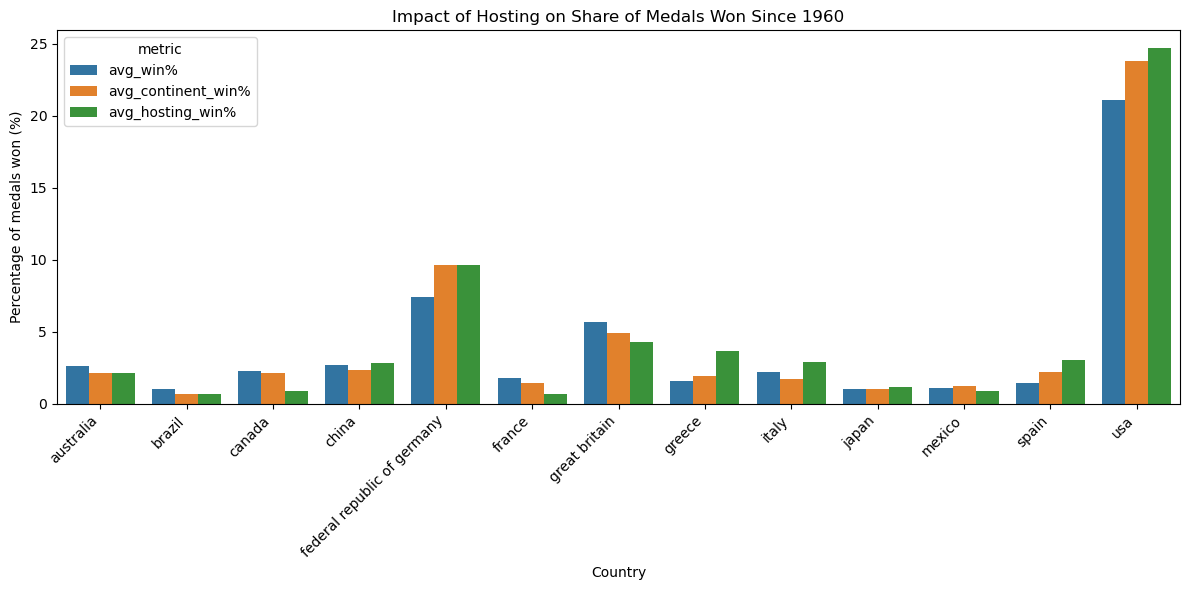

In [416]:
ath_df = country_medals[country_medals['discipline'] == 'athletics']

ath_df = get_ratio_data(ath_df, 1960)
chart_ratio(ath_df, 1960)

C:\Users\olgeo\AppData\Local\Temp\ipykernel_14956\1804162271.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  host_result['host/not_ratio'] = (host_result['avg_hosting_win%'] / host_result['avg_not_hosting_win%']).round(2)
C:\Users\olgeo\AppData\Local\Temp\ipykernel_14956\1804162271.py:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  host_result['continent/not_ratio'] = (host_result['avg_continent_win%'] / host_result['avg_not_continent_win%']).round(2)


Since 1960 hosting delivers an average of 3.2% more medals
Since 1960 being in the host continent wins you 18.5% more medals


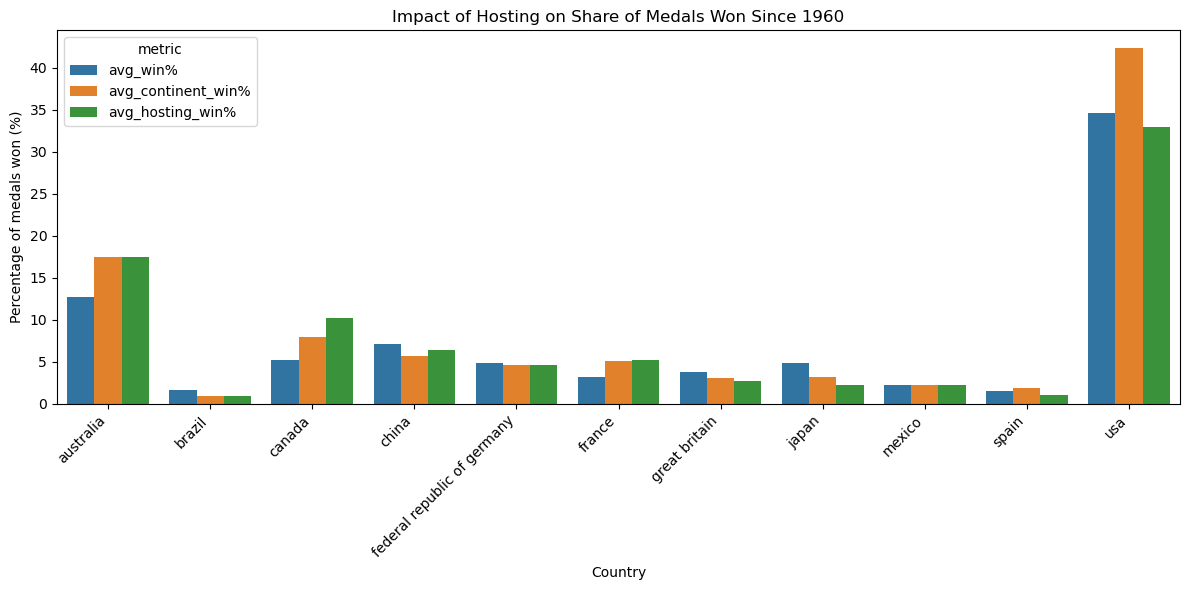

In [420]:
swim_df = country_medals[country_medals['discipline'] == 'swimming']

swim_df = get_ratio_data(swim_df, 1960)
chart_ratio(swim_df, 1960)

C:\Users\olgeo\AppData\Local\Temp\ipykernel_14956\1804162271.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  host_result['host/not_ratio'] = (host_result['avg_hosting_win%'] / host_result['avg_not_hosting_win%']).round(2)
C:\Users\olgeo\AppData\Local\Temp\ipykernel_14956\1804162271.py:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  host_result['continent/not_ratio'] = (host_result['avg_continent_win%'] / host_result['avg_not_continent_win%']).round(2)


Since 1960 hosting delivers an average of 29.0% more medals
Since 1960 being in the host continent wins you 12.56% more medals


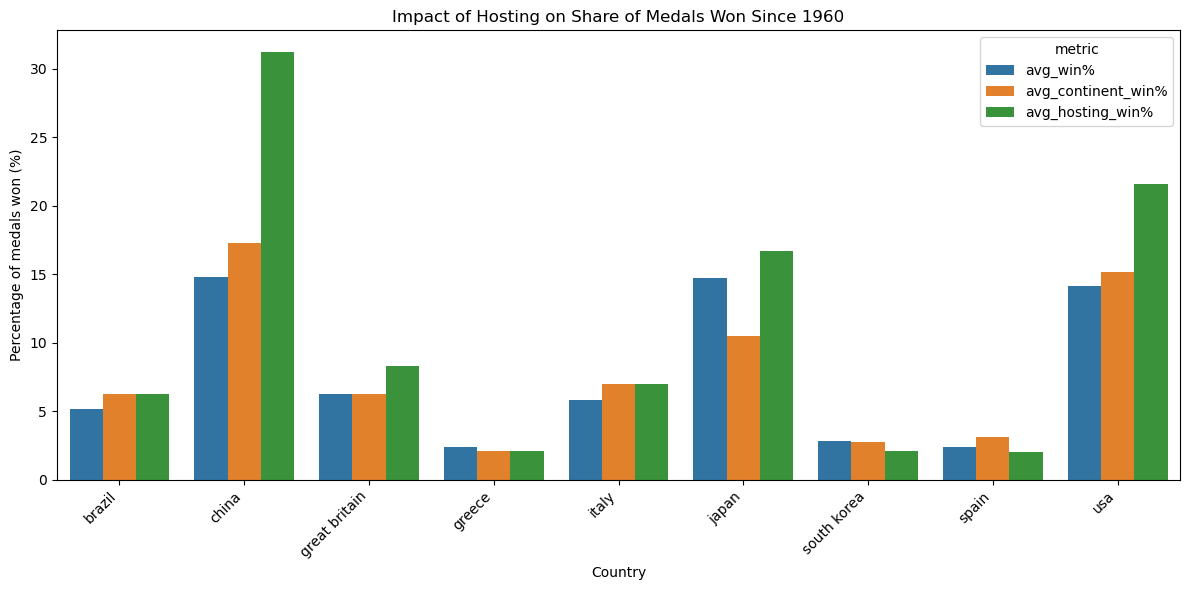

In [430]:
gym_df = country_medals[country_medals['discipline'] == 'gymnastics']

gym_df = get_ratio_data(gym_df, 1960)
chart_ratio(gym_df, 1960)

In [426]:
country_medals['discipline'].unique()

array(['taekwondo', 'wrestling', 'boxing', 'athletics', 'judo',
       'gymnastics', 'polo', 'fencing', 'swimming', 'football', 'rowing',
       'sailing', 'shooting', 'weightlifting', 'equestrian', 'volleyball',
       'tennis', 'hockey', 'basketball', 'cycling', 'rugby', 'diving',
       'canoe', 'baseball/softball', 'beach volleyball', 'archery',
       'water polo', 'trampoline', 'triathlon', 'modern pentathlon',
       'surfing', 'skateboarding', 'handball', 'karate', 'sport climbing',
       'tug of war', 'ice hockey', 'breaking', 'table tennis',
       'badminton', 'golf', 'figure skating'], dtype=object)

C:\Users\olgeo\AppData\Local\Temp\ipykernel_14956\1804162271.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  host_result['host/not_ratio'] = (host_result['avg_hosting_win%'] / host_result['avg_not_hosting_win%']).round(2)
C:\Users\olgeo\AppData\Local\Temp\ipykernel_14956\1804162271.py:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  host_result['continent/not_ratio'] = (host_result['avg_continent_win%'] / host_result['avg_not_continent_win%']).round(2)


Since 1960 hosting delivers an average of 78.42% more medals
Since 1960 being in the host continent wins you 17.92% more medals


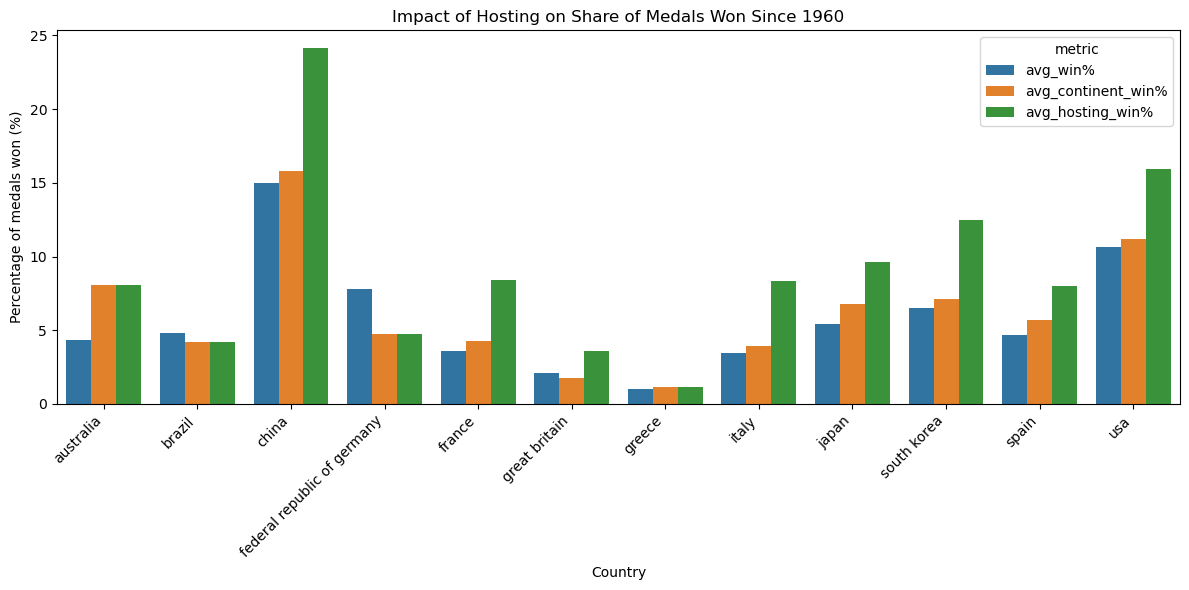

In [428]:
ball_sports = ['football','volleyball','tennis', 'hockey', 'basketball','rugby', 'baseball/softball',
               'beach volleyball','water polo','handball','ice hockey', 'table tennis', 'badminton', 'golf']
aquatic = ['swimming','rowing','sailing','diving','canoe','water polo','surfing']
combat = ['taekwondo', 'wrestling', 'boxing', 'judo', 'fencing', 'karate']

sport_df = country_medals[country_medals['discipline'].isin(ball_sports)]

sport_df = get_ratio_data(sport_df, 1960)
chart_ratio(sport_df, 1960)

C:\Users\olgeo\AppData\Local\Temp\ipykernel_14956\1804162271.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  host_result['host/not_ratio'] = (host_result['avg_hosting_win%'] / host_result['avg_not_hosting_win%']).round(2)
C:\Users\olgeo\AppData\Local\Temp\ipykernel_14956\1804162271.py:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  host_result['continent/not_ratio'] = (host_result['avg_continent_win%'] / host_result['avg_not_continent_win%']).round(2)


Since 1960 hosting delivers an average of 105.62% more medals
Since 1960 being in the host continent wins you 34.92% more medals


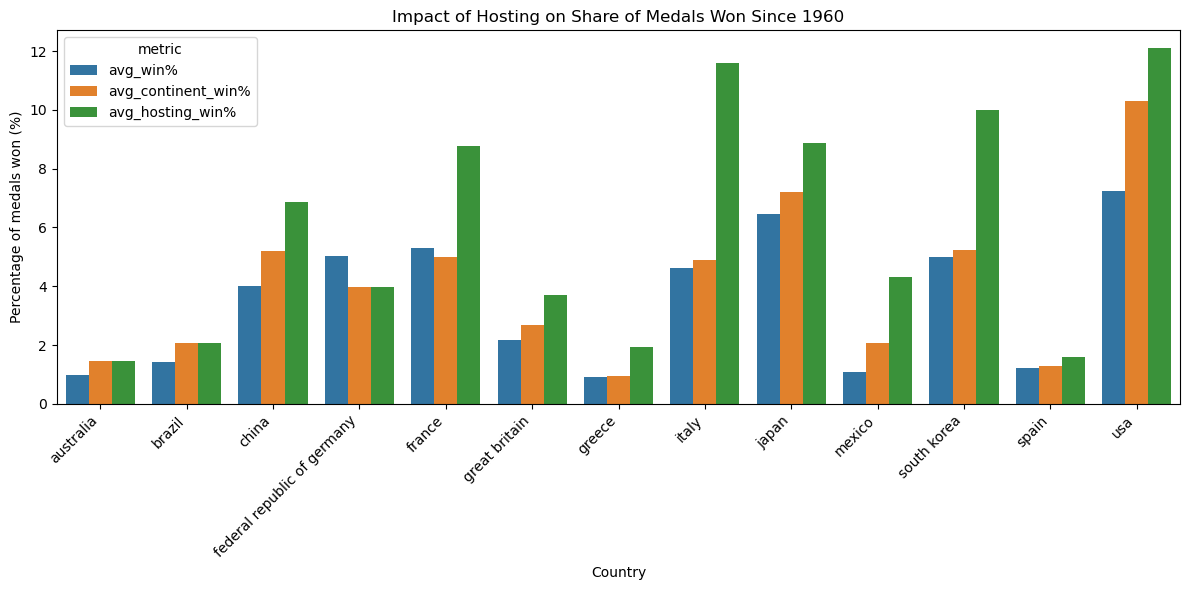

In [432]:
combat_df = country_medals[country_medals['discipline'].isin(combat)]

combat_df = get_ratio_data(combat_df, 1960)
chart_ratio(combat_df, 1960)

In [358]:
year_from = 1960

df = country_medals.copy()

#from 1980
df = df[df['game_year'] >= year_from]

df = df.groupby(['athlete_country', 'game_year', 'is_host_country', 'is_host_continent'], as_index=False)['medal_count'].sum()

# total medals for each year
df['year_total_medals'] = df.groupby('game_year')['medal_count'].transform('sum')

# percentage of medals each country won per year
df['medal_pct'] = (df['medal_count'] / df['year_total_medals']) * 100

# `avg_win%` for each country across all years
avg_win = (
    df.groupby('athlete_country', as_index=False)['medal_pct']
    .mean().round(2)
    .rename(columns={'medal_pct': 'avg_win%'})
)

# Calculate `avg_hosting_win%` - average win percentage when the country is hosting
avg_hosting_win = (
    df[df['is_host_country']]
    .groupby('athlete_country', as_index=False)['medal_pct']
    .mean().round(2)
    .rename(columns={'medal_pct': 'avg_hosting_win%'})
)

# Calculate `avg_not_hosting_win%` - average win percentage when the country is not hosting
avg_not_hosting_win = (
    df[~df['is_host_country']]
    .groupby('athlete_country', as_index=False)['medal_pct']
    .mean().round(2)
    .rename(columns={'medal_pct': 'avg_not_hosting_win%'})
)

# Calculate `avg_continent_win%` - average win percentage when a country on the same continent is hosting
avg_continent_win = (
    df[df['is_host_continent']]
    .groupby('athlete_country', as_index=False)['medal_pct']
    .mean().round(2)
    .rename(columns={'medal_pct': 'avg_continent_win%'})
)

avg_not_continent_win = (
    df[~df['is_host_continent']]
    .groupby('athlete_country', as_index=False)['medal_pct']
    .mean().round(2)
    .rename(columns={'medal_pct': 'avg_not_continent_win%'})
)


# Step 8: Combine all results into a single DataFrame
result = avg_win.merge(avg_hosting_win, on='athlete_country', how='left') \
                .merge(avg_not_hosting_win, on='athlete_country', how='left') \
                .merge(avg_continent_win, on='athlete_country', how='left') \
                .merge(avg_not_continent_win, on='athlete_country', how='left')

result = result.rename(columns={'athlete_country':'country'})

#display(result.sort_values(by='avg_win%', ascending=False))

host_countries = list(df[df['is_host_country'] == True]['athlete_country'].unique())

host_result = result[result['country'].isin(host_countries)]

host_result['host/not_ratio'] = (host_result['avg_hosting_win%'] / host_result['avg_not_hosting_win%']).round(2)
host_result['continent/not_ratio'] = (host_result['avg_continent_win%'] / host_result['avg_not_continent_win%']).round(2)

display(host_result)

print(f"Since {year_from} hosting delivers an average of { (100*(host_result['host/not_ratio'].mean()-1)).round(2)}% more medals")
print(f"Since {year_from} being in the host continent wins you { (100*(host_result['continent/not_ratio'].mean()-1)).round(2)}% more medals")

C:\Users\olgeo\AppData\Local\Temp\ipykernel_14956\65788863.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  host_result['host/not_ratio'] = (host_result['avg_hosting_win%'] / host_result['avg_not_hosting_win%']).round(2)
C:\Users\olgeo\AppData\Local\Temp\ipykernel_14956\65788863.py:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  host_result['continent/not_ratio'] = (host_result['avg_continent_win%'] / host_result['avg_not_continent_win%']).round(2)


,country,avg_win%,avg_hosting_win%,avg_not_hosting_win%,avg_continent_win%,avg_not_continent_win%,host/not_ratio,continent/not_ratio
5,australia,3.69,6.26,3.53,6.26,3.53,1.77,1.77
15,brazil,1.08,1.95,1.03,1.95,1.03,1.89,1.89
21,canada,1.94,1.79,1.95,2.94,1.61,0.92,1.83
23,china,7.07,10.45,6.73,7.47,6.92,1.55,1.08
43,federal republic of germany,6.37,6.68,6.29,6.68,6.29,1.06,1.06
46,france,3.30,5.95,3.14,3.34,3.28,1.89,1.02
52,great britain,4.05,6.79,3.88,4.28,3.92,1.75,1.09
53,greece,0.54,1.73,0.46,0.57,0.53,3.76,1.08
68,italy,3.54,7.81,3.27,3.92,3.33,2.39,1.18
70,japan,3.80,5.56,3.54,3.91,3.76,1.57,1.04


Since 1960 host countries win 101.29% more medals than when they don't
Since 1960 being in the host continent wins you 33.21% more medals than not


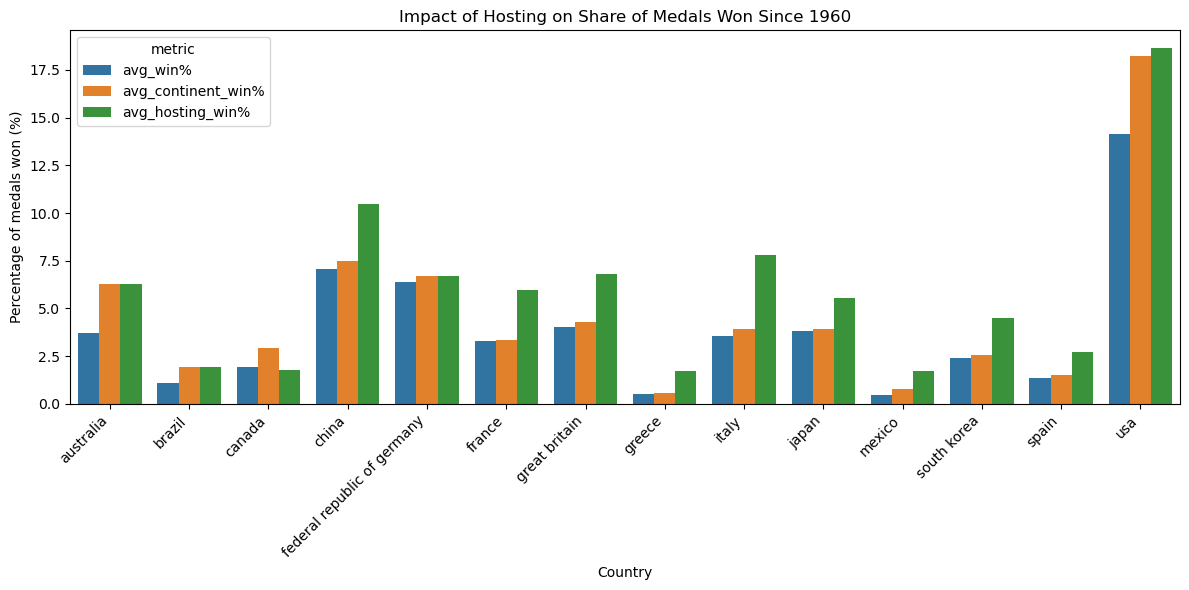

In [386]:
import matplotlib.pyplot as plt
import seaborn as sns

df = host_result.copy()

df_melted = df.melt(id_vars='country', value_vars=['avg_win%', 'avg_continent_win%', 'avg_hosting_win%'],
                    var_name='metric', value_name='value')

plt.figure(figsize=(12, 6))
sns.barplot(x='country', y='value', hue='metric', data=df_melted)

# Customize the plot
plt.title('Impact of Hosting on Share of Medals Won Since 1960')
plt.xlabel('Country')
plt.ylabel('Percentage of medals won (%)')
plt.xticks(rotation=45, ha='right')  # Rotate country labels for better readability
plt.tight_layout()

# Show the plot
plt.show()

In [378]:
cont_result = host_result.merge(country_df, left_on="country", right_on="country_name", how = 'left').reset_index(drop=True)

cont_result.head()

# Group by 'continent' and calculate the mean of 'continent/not_ratio'
mean_continent_not_ratio = cont_result.groupby('continent')['continent/not_ratio'].mean().reset_index()

# Display the result
print(mean_continent_not_ratio)

#This is from 1960

       continent  continent/not_ratio
0           asia             1.073333
1         europe             1.110000
2  north america             1.703333
3        oceania             1.770000
4  south america             1.890000


In [390]:
year_from = 1960

df = country_medals.copy()

#from 1980
df = df[df['game_year'] >= year_from]

dfg = df.copy()

dfg = dfg[dfg['medal_type'] == 'gold']


dfg = dfg.groupby(['athlete_country', 'game_year', 'is_host_country', 'is_host_continent'], as_index=False)['medal_count'].sum()

# total medals for each year
dfg['year_total_medals'] = dfg.groupby('game_year')['medal_count'].transform('sum')

# percentage of medals each country won per year
dfg['medal_pct'] = (dfg['medal_count'] / dfg['year_total_medals']) * 100

# `avg_win%` for each country across all years
gavg_win = (
    dfg.groupby('athlete_country', as_index=False)['medal_pct']
    .mean().round(2)
    .rename(columns={'medal_pct': 'avg_win%'})
)

# Calculate `avg_hosting_win%` - average win percentage when the country is hosting
gavg_hosting_win = (
    dfg[dfg['is_host_country']]
    .groupby('athlete_country', as_index=False)['medal_pct']
    .mean().round(2)
    .rename(columns={'medal_pct': 'avg_hosting_win%'})
)

# Calculate `avg_not_hosting_win%` - average win percentage when the country is not hosting
gavg_not_hosting_win = (
    dfg[~dfg['is_host_country']]
    .groupby('athlete_country', as_index=False)['medal_pct']
    .mean().round(2)
    .rename(columns={'medal_pct': 'avg_not_hosting_win%'})
)

# Calculate `avg_continent_win%` - average win percentage when a country on the same continent is hosting
gavg_continent_win = (
    dfg[dfg['is_host_continent']]
    .groupby('athlete_country', as_index=False)['medal_pct']
    .mean().round(2)
    .rename(columns={'medal_pct': 'avg_continent_win%'})
)

gavg_not_continent_win = (
    dfg[~dfg['is_host_continent']]
    .groupby('athlete_country', as_index=False)['medal_pct']
    .mean().round(2)
    .rename(columns={'medal_pct': 'avg_not_continent_win%'})
)


# Step 8: Combine all results into a single DataFrame
gresult = gavg_win.merge(gavg_hosting_win, on='athlete_country', how='left') \
                .merge(gavg_not_hosting_win, on='athlete_country', how='left') \
                .merge(gavg_continent_win, on='athlete_country', how='left') \
                .merge(gavg_not_continent_win, on='athlete_country', how='left')

gresult = gresult.rename(columns={'athlete_country':'country'})

#display(result.sort_values(by='avg_win%', ascending=False))

host_countries = list(df[df['is_host_country'] == True]['athlete_country'].unique())

g_host_result = gresult[gresult['country'].isin(host_countries)]

g_host_result['host/not_ratio'] = (g_host_result['avg_hosting_win%'] / g_host_result['avg_not_hosting_win%']).round(2)
g_host_result['continent/not_ratio'] = (g_host_result['avg_continent_win%'] / g_host_result['avg_not_continent_win%']).round(2)

display(g_host_result)

print(f"Since {year_from} hosting delivers an average of { (100*(g_host_result['host/not_ratio'].mean()-1)).round(2)}% more gold medals")
print(f"Since {year_from} being in the host continent wins you { (100*(g_host_result['continent/not_ratio'].mean()-1)).round(2)}% more gold medals")

C:\Users\olgeo\AppData\Local\Temp\ipykernel_14956\2668081437.py:74: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  g_host_result['host/not_ratio'] = (g_host_result['avg_hosting_win%'] / g_host_result['avg_not_hosting_win%']).round(2)
C:\Users\olgeo\AppData\Local\Temp\ipykernel_14956\2668081437.py:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  g_host_result['continent/not_ratio'] = (g_host_result['avg_continent_win%'] / g_host_result['avg_not_continent_win%']).round(2)


,country,avg_win%,avg_hosting_win%,avg_not_hosting_win%,avg_continent_win%,avg_not_continent_win%,host/not_ratio,continent/not_ratio
3,australia,3.59,5.33,3.48,5.33,3.48,1.53,1.53
12,brazil,1.15,2.28,1.04,2.28,1.04,2.19,2.19
16,canada,1.58,NaN,1.58,2.04,1.44,NaN,1.42
18,china,9.08,15.89,8.40,9.72,8.84,1.89,1.10
34,federal republic of germany,5.34,6.67,5.00,6.67,5.00,1.33,1.33
37,france,3.01,5.03,2.87,3.29,2.88,1.75,1.14
41,great britain,3.60,9.60,3.22,3.66,3.56,2.98,1.03
42,greece,0.96,1.99,0.83,0.93,0.97,2.40,0.96
54,italy,3.65,8.55,3.34,3.86,3.53,2.56,1.09
56,japan,4.30,8.88,3.64,5.60,3.86,2.44,1.45


Since 1960 hosting delivers an average of 129.46% more gold medals
Since 1960 being in the host continent wins you 45.5% more gold medals


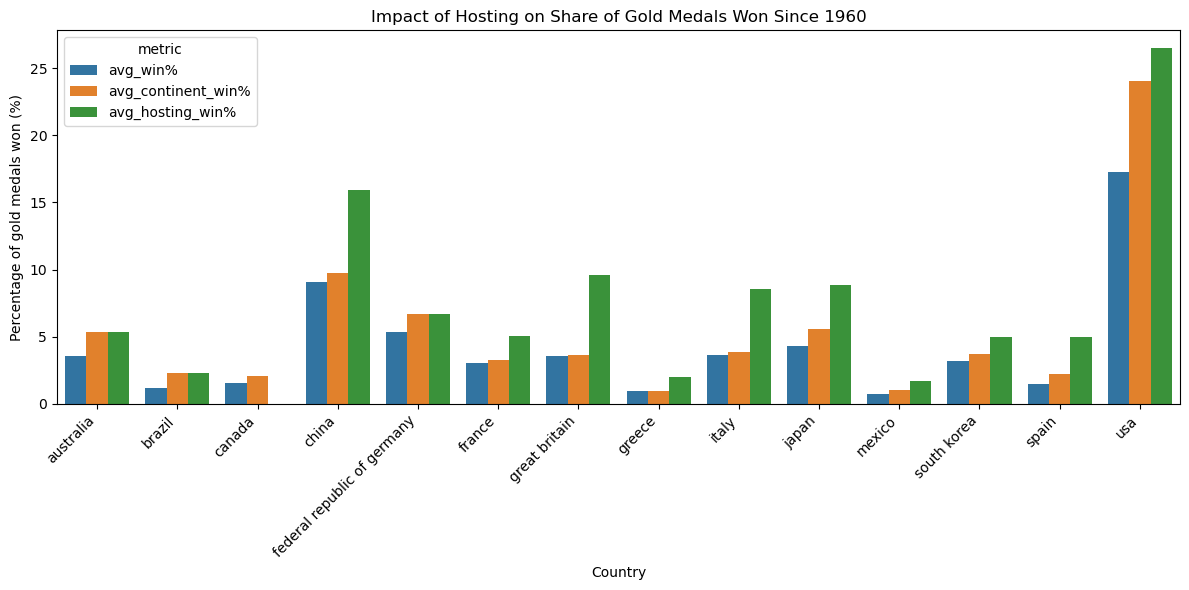

In [394]:
import matplotlib.pyplot as plt
import seaborn as sns

df = g_host_result.copy()

df_melted = df.melt(id_vars='country', value_vars=['avg_win%', 'avg_continent_win%', 'avg_hosting_win%'],
                    var_name='metric', value_name='value')

plt.figure(figsize=(12, 6))
sns.barplot(x='country', y='value', hue='metric', data=df_melted)

# Customize the plot
plt.title('Impact of Hosting on Share of Gold Medals Won Since 1960')
plt.xlabel('Country')
plt.ylabel('Percentage of gold medals won (%)')
plt.xticks(rotation=45, ha='right')  # Rotate country labels for better readability
plt.tight_layout()

# Show the plot
plt.show()

In [398]:
g_cont_result = g_host_result.merge(country_df, left_on="country", right_on="country_name", how = 'left').reset_index(drop=True)

g_cont_result.head()

# Group by 'continent' and calculate the mean of 'continent/not_ratio'
g_mean_continent_not_ratio = g_cont_result.groupby('continent')['continent/not_ratio'].mean().reset_index()

# Display the result
print(g_mean_continent_not_ratio)

#This is from 1960

       continent  continent/not_ratio
0           asia             1.253333
1         europe             1.251667
2  north america             1.793333
3        oceania             1.530000
4  south america             2.190000
